# PM2.5 prediction

### Import libraries

In [1]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from scipy.stats import stats
seed(1)
from fs import methods as m
from fs import model as ml
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


### Data Import

2022-05-10 16:46:43.342023: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-10 16:46:43.342809: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                169       
_________________________________________________________________
dense_1 (Dense)              (None, 392)               5488      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 393       
Total params: 6,050
Trainable params: 6,050
Non-trainable params: 0
_________________________________________________________________
---------17/10 - 23/10 (2021)---------
Train on 17 samples, validate on 5 samples
Epoch 1/30
17/17 [==============================] - 1s 57ms/sample - loss: 0.2833 - mse: 0.2833 - mae: 0.4545 - accuracy: 0.0000e+00 - val_loss: 0.0586 - val_mse: 0.0586 - val_mae: 0.2303 - val_accuracy: 0.2000
Epoch 2/30
17/17 [==============================] - 0s 4ms/s

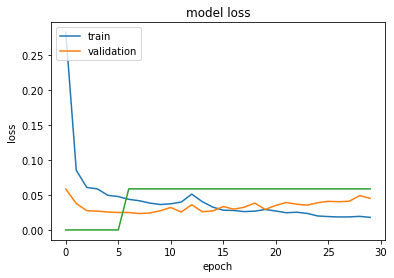

---------MODEL---------
Values predicted:  [[36.499367]
 [28.635904]
 [12.534847]
 [47.63186 ]
 [16.715984]
 [46.56758 ]]
Values :  [[32.57142857]
 [27.51785714]
 [13.14285714]
 [47.28571429]
 [ 9.57142857]
 [36.57142857]]
Mean Absolute Error:  3.856808026631674
Mean Squared Error:  28.02266067534202
Mean (Y-test): 27.77678571428571
Mean (Y-predicted):  31.430923
R2 score:  0.8362184270622561
---------RESULTS WITH RESPECT THE ENTIRE DATASET---------
Mean Absolute Error:  6.815331186567034
Mean Squared Error:  71.00948499345388
Mean (Y-test): 28.969154255730764
Mean (Y-predicted):  35.65654567309788
R2 score:  -0.3201460195326562
---------24/03 - 31/03 (2021)---------
Train on 17 samples, validate on 5 samples
Epoch 1/30
17/17 [==============================] - 0s 7ms/sample - loss: 0.0778 - mse: 0.0778 - mae: 0.2216 - accuracy: 0.0588 - val_loss: 0.0222 - val_mse: 0.0222 - val_mae: 0.1090 - val_accuracy: 0.2000
Epoch 2/30
17/17 [=======

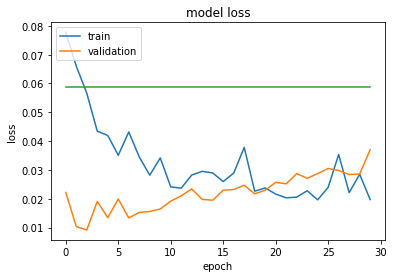

---------MODEL---------
Values predicted:  [[26.646717]
 [32.94825 ]
 [26.95249 ]
 [24.943811]
 [26.841034]
 [21.013866]]
Values :  [[25.75      ]
 [27.25      ]
 [35.61607143]
 [26.75      ]
 [20.        ]
 [26.5       ]]
Mean Absolute Error:  4.898650759742374
Mean Squared Error:  31.415253718986406
Mean (Y-test): 26.977678571428573
Mean (Y-predicted):  26.557695
R2 score:  -0.5058697707736324
---------RESULTS WITH RESPECT THE ENTIRE DATASET---------
Mean Absolute Error:  12.144680431910924
Mean Squared Error:  178.76456815392626
Mean (Y-test): 37.705020904541016
Mean (Y-predicted):  26.23690755026681
R2 score:  -1.5351736728397758
---------17/07 - 24/07 (2021)---------
Train on 17 samples, validate on 5 samples
Epoch 1/30
17/17 [==============================] - 0s 5ms/sample - loss: 0.0722 - mse: 0.0722 - mae: 0.2316 - accuracy: 0.0000e+00 - val_loss: 0.1131 - val_mse: 0.1131 - val_mae: 0.2908 - val_accuracy: 0.0000e+00
Epoch 2/30
17/17 [==================

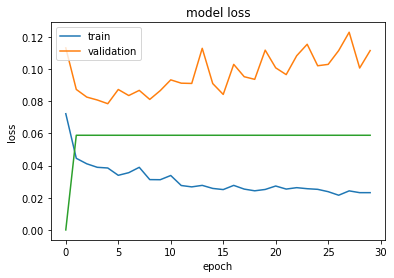

---------MODEL---------
Values predicted:  [[13.3578205]
 [12.590593 ]
 [12.420779 ]
 [12.214516 ]
 [12.333566 ]
 [11.093719 ]]
Values :  [[17.375]
 [12.375]
 [12.375]
 [ 9.875]
 [13.875]
 [14.   ]]
Mean Absolute Error:  1.8442972501118977
Mean Squared Error:  5.413688762118757
Mean (Y-test): 13.3125
Mean (Y-predicted):  12.335166
R2 score:  -0.052319151938042374
---------RESULTS WITH RESPECT THE ENTIRE DATASET---------
Mean Absolute Error:  1.3466030188969202
Mean Squared Error:  3.650617360017447
Mean (Y-test): 12.03781771659851
Mean (Y-predicted):  12.662338120596749
R2 score:  -0.21996280316929906
---------03/09 - 10/09 (2021)---------
Train on 18 samples, validate on 5 samples
Epoch 1/30
18/18 [==============================] - 0s 5ms/sample - loss: 0.0557 - mse: 0.0557 - mae: 0.1759 - accuracy: 0.1111 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1401 - val_accuracy: 0.0000e+00
Epoch 2/30
18/18 [==============================] - 0

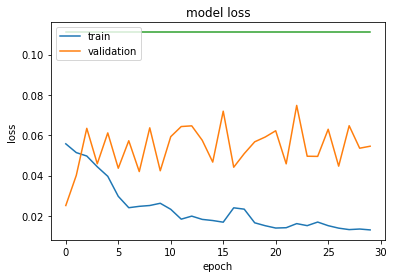

---------MODEL---------
Values predicted:  [[13.74042 ]
 [24.4795  ]
 [16.106476]
 [18.320024]
 [13.037924]
 [16.294899]]
Values :  [[17.        ]
 [27.875     ]
 [11.6875    ]
 [12.125     ]
 [ 8.625     ]
 [14.74107143]]
Mean Absolute Error:  3.872638588859921
Mean Squared Error:  16.99137225424739
Mean (Y-test): 15.342261904761905
Mean (Y-predicted):  16.996542
R2 score:  0.5548281510318537
---------RESULTS WITH RESPECT THE ENTIRE DATASET---------
Mean Absolute Error:  2.667977004215635
Mean Squared Error:  11.583739875961987
Mean (Y-test): 17.295097449730182
Mean (Y-predicted):  17.49831692925815
R2 score:  -0.8093315246351498
---------18/04 - 25/04 (2021)---------
Train on 17 samples, validate on 5 samples
Epoch 1/30
17/17 [==============================] - 0s 6ms/sample - loss: 0.0428 - mse: 0.0428 - mae: 0.1530 - accuracy: 0.0588 - val_loss: 0.1402 - val_mse: 0.1402 - val_mae: 0.3348 - val_accuracy: 0.0000e+00
Epoch 2/30
17/17 [=====================

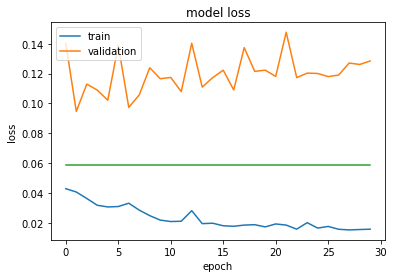

---------MODEL---------
Values predicted:  [[14.216581]
 [17.736841]
 [21.135885]
 [16.53719 ]
 [15.38407 ]
 [20.637459]]
Values :  [[16.   ]
 [13.25 ]
 [21.625]
 [19.   ]
 [17.625]
 [24.625]]
Mean Absolute Error:  2.575109322865804
Mean Squared Error:  8.423207543239338
Mean (Y-test): 18.6875
Mean (Y-predicted):  17.608004
R2 score:  0.382903425240121
---------RESULTS WITH RESPECT THE ENTIRE DATASET---------
Mean Absolute Error:  7.760538748332432
Mean Squared Error:  78.42572995270332
Mean (Y-test): 25.123526913779124
Mean (Y-predicted):  17.539998156683787
R2 score:  -2.7937000737862308


In [2]:
geopackages = os.listdir('grids')
geopackages.remove('.DS_Store')

TARGET = 'pm25_st'
NUMBER_OF_PARAMS = 10
NUMBER_OF_COVARIATES = NUMBER_OF_PARAMS + 2

NUMBER_OF_SAMPLES = 28

model = Sequential()
model.add(Dense(NUMBER_OF_COVARIATES+1, input_dim=NUMBER_OF_COVARIATES, kernel_initializer='normal', activation='relu'))
model.add(Dense(NUMBER_OF_SAMPLES*(NUMBER_OF_COVARIATES+2), activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae', 'accuracy'])

for grid in geopackages:
    data = gpd.read_file('grids/'+ grid)


    data = data[~data[TARGET].isnull()]
    data = data.dropna(axis=1)


    data.pop('geometry')
    data.pop('bottom')
    data.pop('top')
    data.pop('left')
    data.pop('right')

    labels = pd.read_csv('results/grid_cams_0418_0425_2021.csv')
    labels = ml.remove_int_values(list(labels['Features']))
    labels=labels[0:NUMBER_OF_PARAMS]
    #read variables which are not null
    score_results = pd.DataFrame()

    #Store dataset in x and y variables
    X = pd.DataFrame(data=data, columns=labels ).dropna(axis = 1)
    X['lat_cen'] = data['lat_cen']
    X['lng_cen'] = data['lng_cen']

    Y = pd.DataFrame(data=data, columns=[TARGET] )
    Y = Y.values.ravel()


    #NUMBER_OF_COVARIATES = X.shape[1]
    y1 = np.array(Y)

    X_train, X_val, y_train, y_val = train_test_split(X, y1, test_size=0.20)

    y_train=np.reshape(y_train, (-1,1))
    y_val=np.reshape(y_val, (-1,1))

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()

    scaler_x.fit(X_train)
    xtrain_scale=scaler_x.transform(X_train)
    scaler_x.fit(X_val)
    xval_scale=scaler_x.transform(X_val)

    scaler_y.fit(y_train)
    ytrain_scale=scaler_y.transform(y_train)
    scaler_y.fit(y_val)
    yval_scale=scaler_y.transform(y_val)
    print('---------'+ m.getTitle_gpkg(grid) +'---------')

    history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=1, verbose=1, validation_split=0.20)
    predictions = model.predict(xval_scale)

    print(history.history.keys())
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    predictions = scaler_y.inverse_transform(predictions)

    print('---------MODEL---------')
    print('Values predicted: ', predictions)
    print('Values : ', scaler_y.inverse_transform(yval_scale))

    print('Mean Absolute Error: ',mean_absolute_error(y_val, predictions))
    print('Mean Squared Error: ',mean_squared_error(y_val, predictions))
    print('Mean (Y-test):',np.mean(y_val))
    print('Mean (Y-predicted): ',np.mean(predictions))
    print('R2 score: ',r2_score(y_val, predictions))

    #%%

    data_new = gpd.read_file('grids/'+ grid)
    data_new = data_new[~data_new[TARGET].isnull()]
    pm25_obs = data_new['pm25_cams']
    X_new = pd.DataFrame(data=data_new, columns=labels).dropna(axis=1)
    X_new['lat_cen'] = data_new['lat_cen']
    X_new['lng_cen'] = data_new['lng_cen']
    scaler_x = MinMaxScaler()
    scaler_x.fit(X_new)
    X_new_scale=scaler_x.transform(X_new)




    predictions_pm25 = model.predict(X_new_scale)
    predictions_pm25 = pd.Series(np.array(scaler_y.inverse_transform(predictions_pm25)).reshape((-1,)))
    e = pd.DataFrame()

    e['predictions_pm25'] = list(predictions_pm25)
    e['pm25_obs'] = list(pm25_obs)
    e = e.dropna(axis=0)
    print('---------RESULTS WITH RESPECT THE ENTIRE DATASET---------')
    print('Mean Absolute Error: ',mean_absolute_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean Squared Error: ',mean_squared_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean (Y-test):',np.mean(e['pm25_obs']))
    print('Mean (Y-predicted): ',np.mean(e['predictions_pm25']))
    print('R2 score: ',r2_score(e['pm25_obs'], e['predictions_pm25']))